In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/himanshuneeraj/Medical Insurance Cost Dataset.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()
duplicates = df.duplicated().sum()
print(f"\n--- Duplicates found: {duplicates} ---")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")


--- Duplicates found: 1 ---
Duplicates removed.


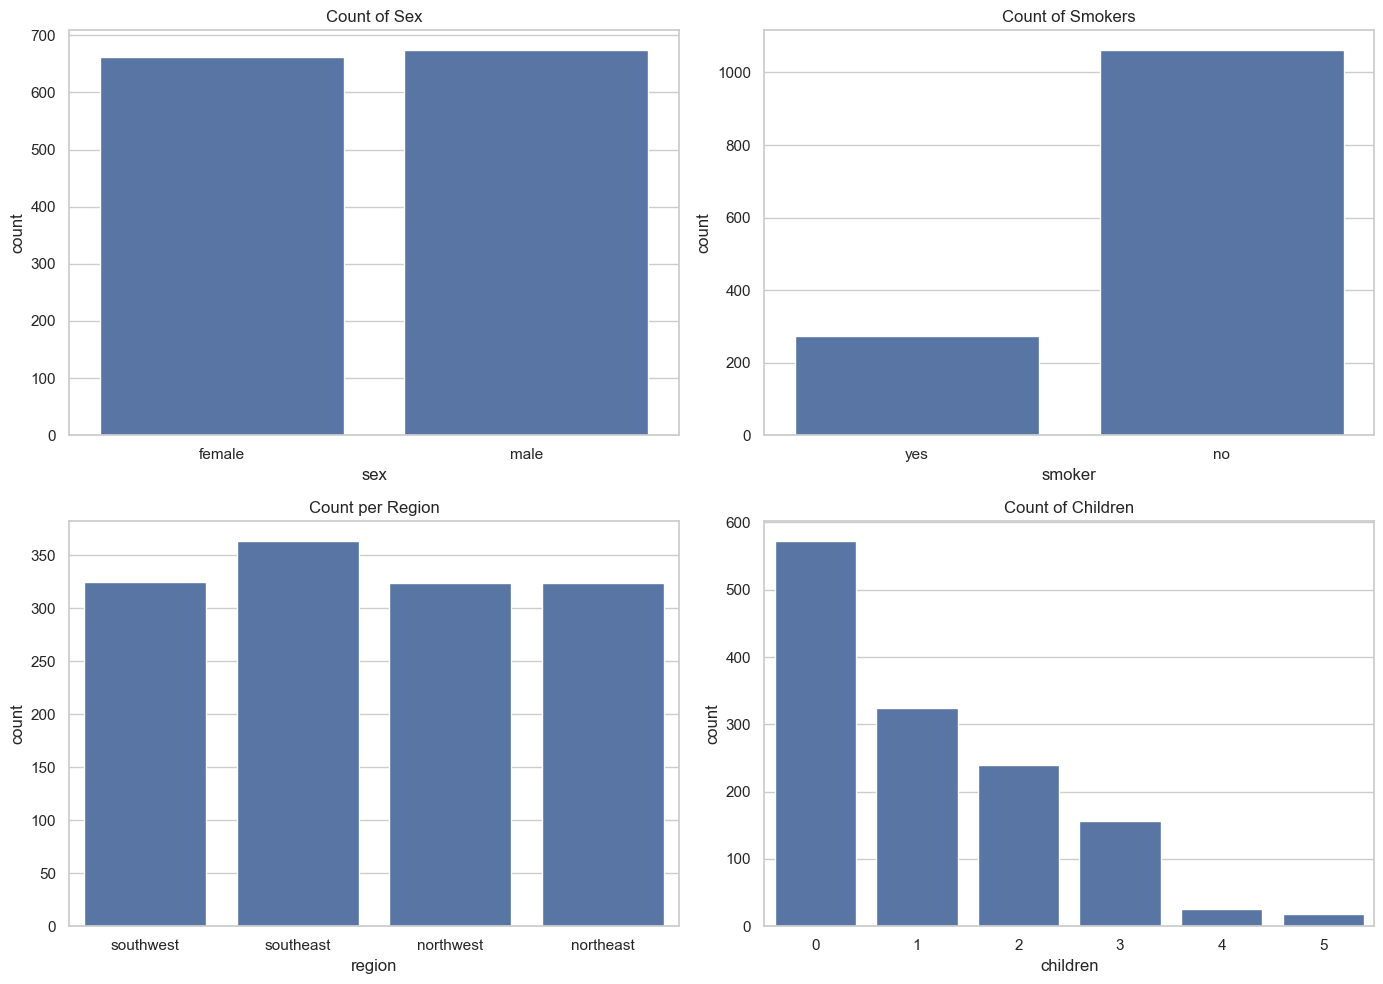

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='sex', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Sex')

sns.countplot(x='smoker', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Smokers')

sns.countplot(x='region', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Count per Region')

sns.countplot(x='children', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count of Children')

plt.tight_layout()
plt.show()

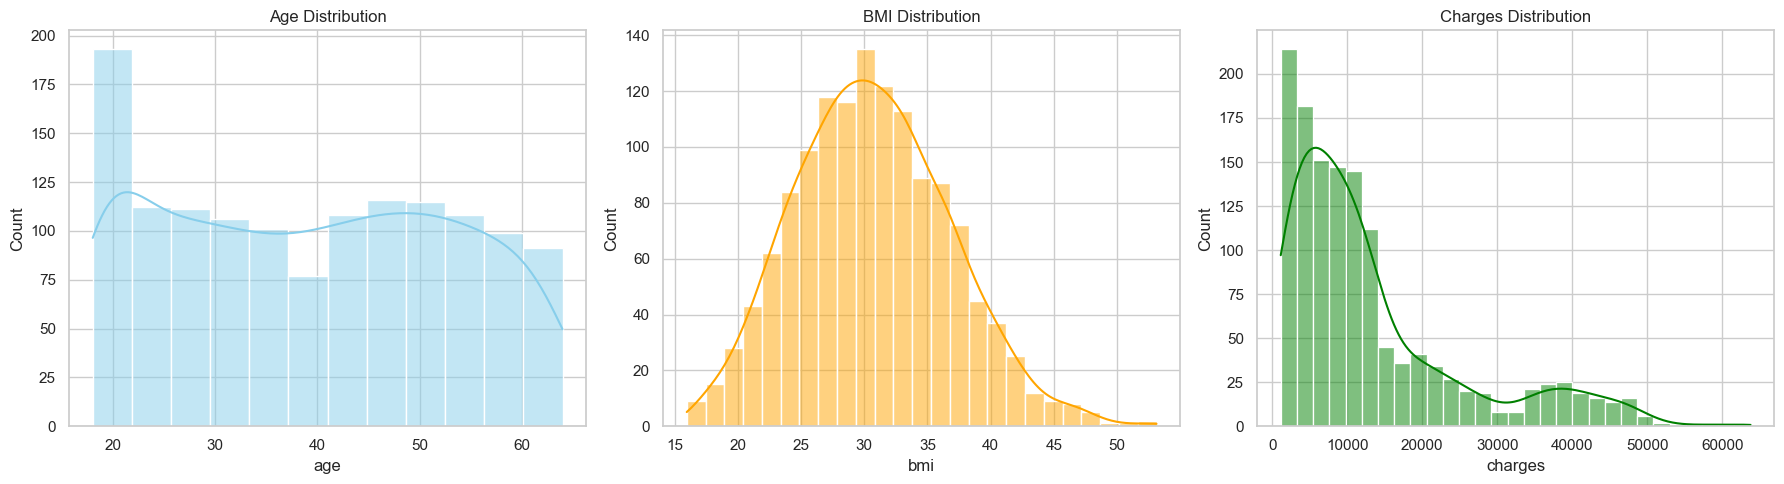

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='age', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(data=df, x='bmi', kde=True, ax=axes[1], color='orange')
axes[1].set_title('BMI Distribution')

sns.histplot(data=df, x='charges', kde=True, ax=axes[2], color='green')
axes[2].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

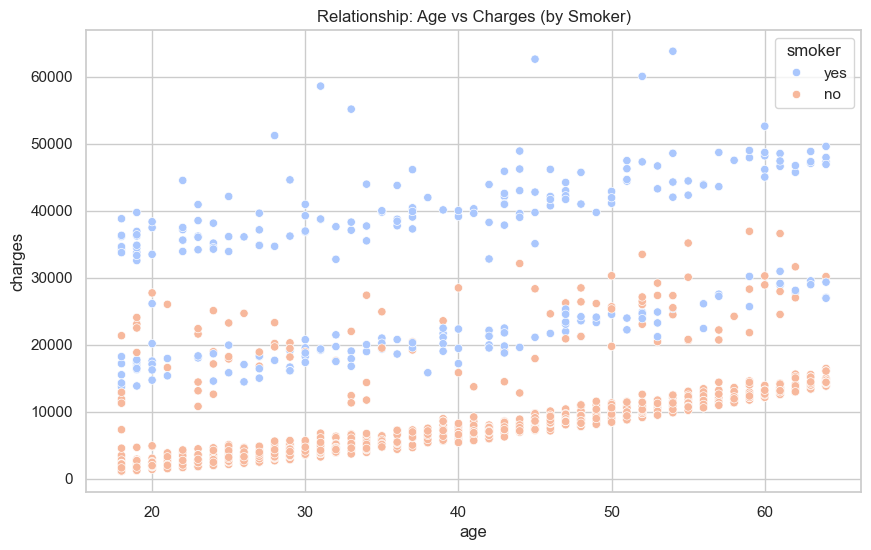

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
plt.title('Relationship: Age vs Charges (by Smoker)')
plt.show()

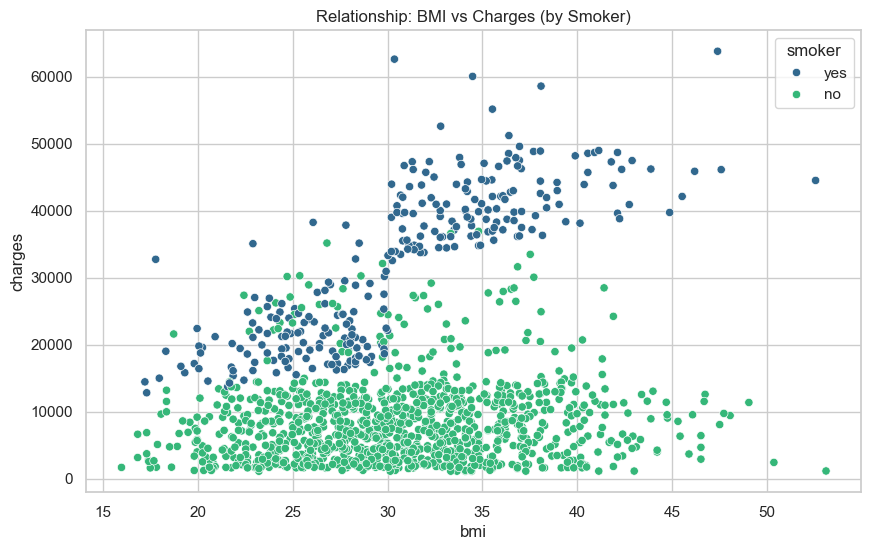

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='viridis')
plt.title('Relationship: BMI vs Charges (by Smoker)')
plt.show()

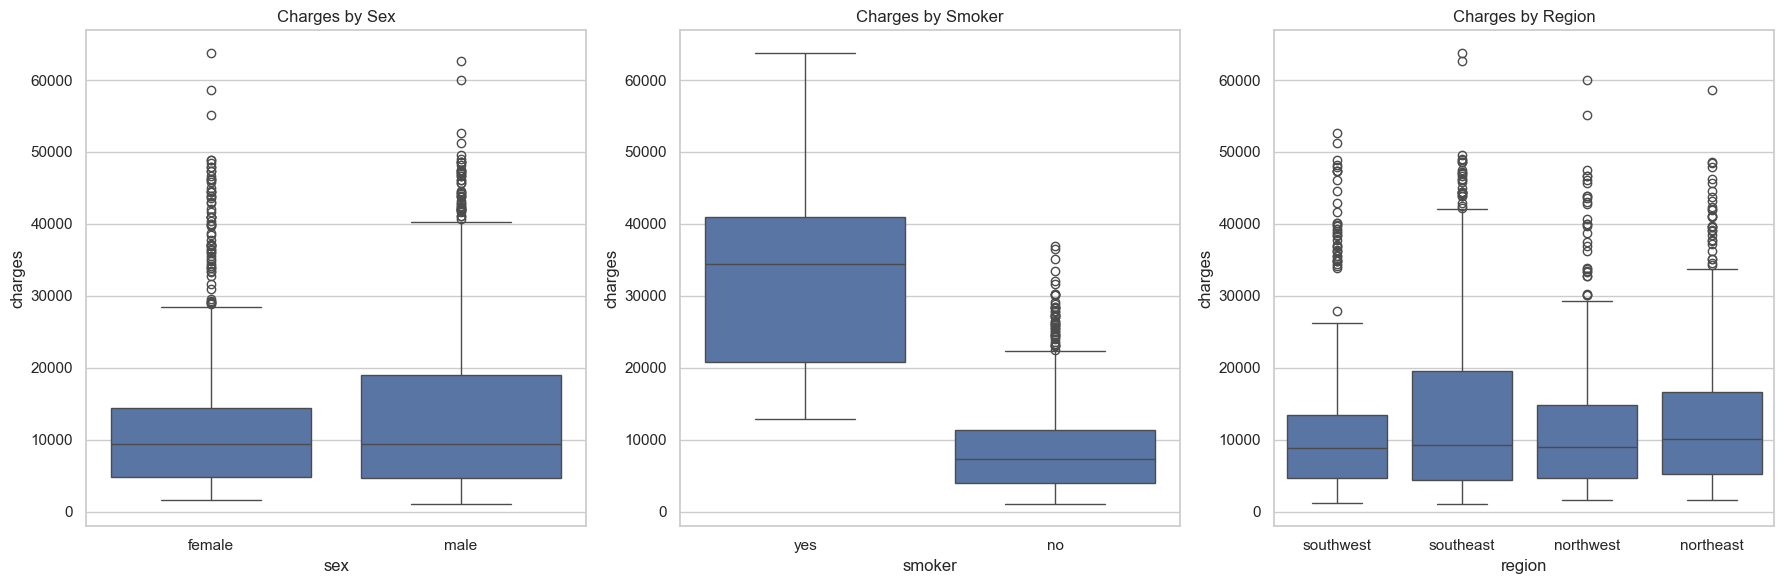

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='sex', y='charges', data=df, ax=axes[0])
axes[0].set_title('Charges by Sex')

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1])
axes[1].set_title('Charges by Smoker')

sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
axes[2].set_title('Charges by Region')

plt.tight_layout()
plt.show()

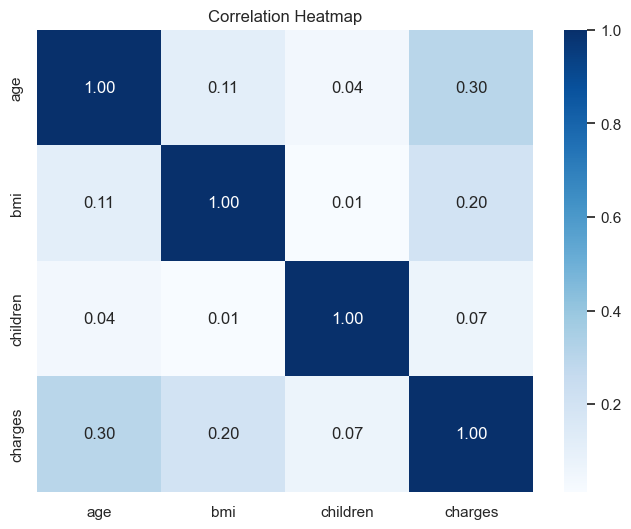

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


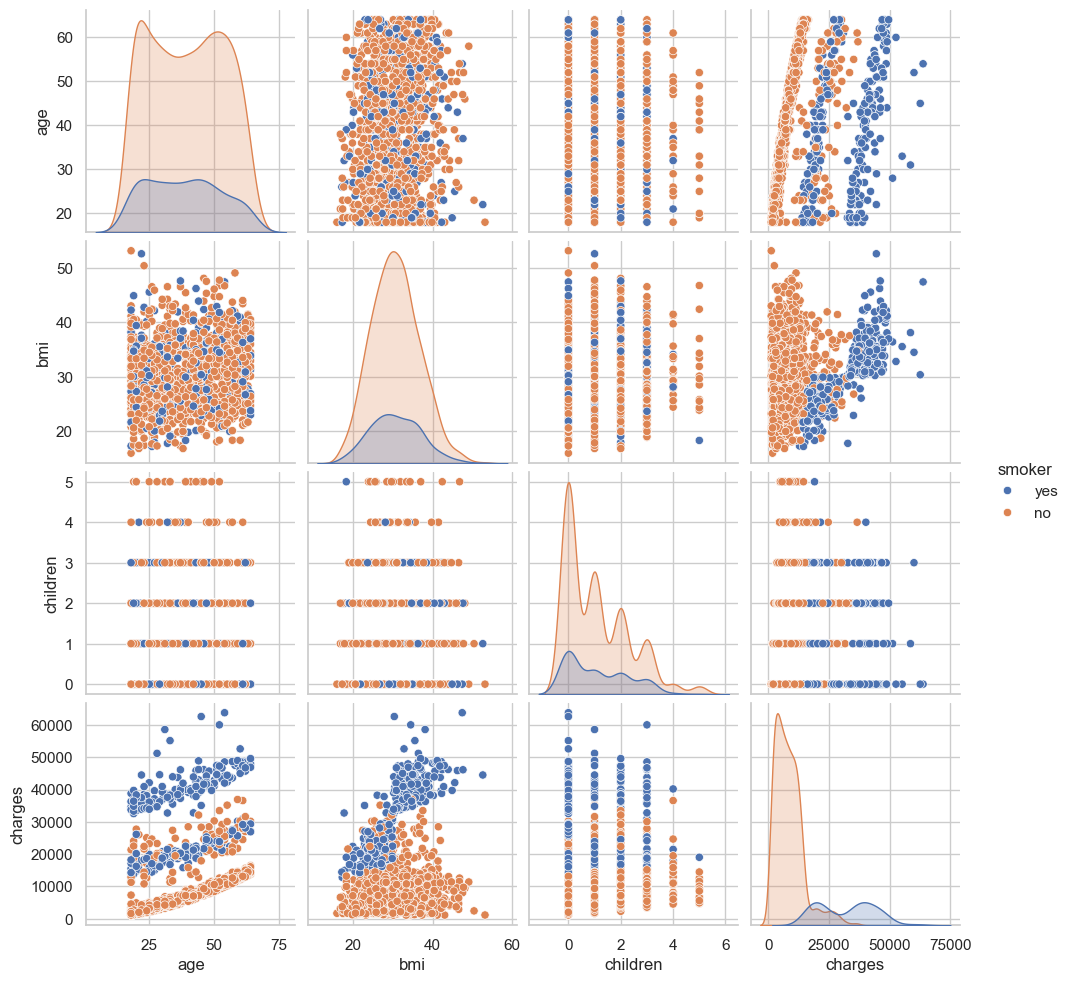

In [16]:
sns.pairplot(df, hue='smoker')
plt.show()